<a href="https://colab.research.google.com/github/nimisha-sen/AI-ML/blob/main/0_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install and Import Dependencies

In [1]:
!pip3 install torch torchvision torchaudio
#!pip3 install opencv-python
!pip3 install --upgrade opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16512, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 16512 (delta 41), reused 49 (delta 15), pack-reused 16408
Receiving objects: 100% (16512/16512), 15.17 MiB | 20.17 MiB/s, done.
Resolving deltas: 100% (11301/11301), done.


In [4]:
!cd yolov5 & pip install -r requirements.txt

In [5]:
import torch
from matplotlib import pyplot as plt
import cv2
import numpy as np

## Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, trust_repo=True)  # or yolov5n - yolov5x6 or custom

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 231.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.3s, installed 1 package: ['gitpython>=3.1.30']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-3-9 Python-3.10.12 torch-2.1.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 85.0MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Make Detection with Images

In [8]:
img = '/content/man_walking_dog.jpeg'

In [9]:
results = model(img)
results.print()

image 1/1: 1434x2091 3 persons, 4 cars, 2 dogs
Speed: 258.4ms pre-process, 271.5ms inference, 19.9ms NMS per image at shape (1, 3, 448, 640)


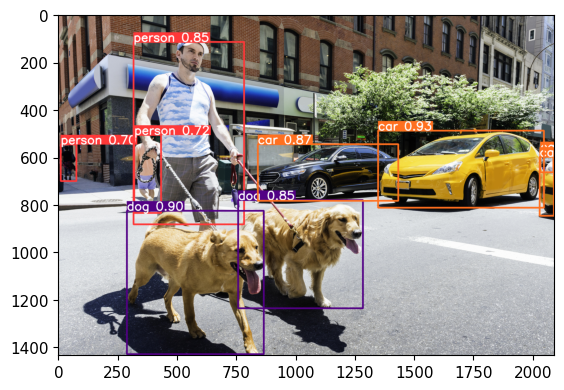

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
results.render()

[array([[[173, 141, 130],
         [175, 146, 132],
         [176, 144, 131],
         ...,
         [108, 115, 159],
         [136, 146, 173],
         [133, 144, 176]],
 
        [[177, 144, 135],
         [179, 149, 138],
         [177, 148, 134],
         ...,
         [110, 118, 157],
         [136, 146, 171],
         [136, 147, 177]],
 
        [[175, 145, 137],
         [179, 149, 139],
         [174, 144, 133],
         ...,
         [114, 122, 159],
         [142, 152, 177],
         [131, 140, 173]],
 
        ...,
 
        [[175, 179, 188],
         [166, 170, 179],
         [168, 172, 181],
         ...,
         [169, 170, 174],
         [158, 156, 167],
         [151, 149, 160]],
 
        [[163, 170, 180],
         [155, 159, 170],
         [162, 166, 177],
         ...,
         [170, 168, 182],
         [148, 146, 160],
         [144, 142, 156]],
 
        [[162, 169, 179],
         [153, 157, 169],
         [156, 160, 172],
         ...,
         [164, 164, 174],
  

## Real Time Detection

In [23]:
!pip show opencv-python


Name: opencv-python
Version: 4.9.0.80
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, numpy, numpy, numpy
Required-by: dopamine-rl, imgaug, ultralytics


In [17]:
#cap = cv2.VideoCapture(2)  # Try different indices: 0, 1, 2, etc.


## Camera Capture

In [18]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [24]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

## Make Real Time Detections

In [ ]:
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()